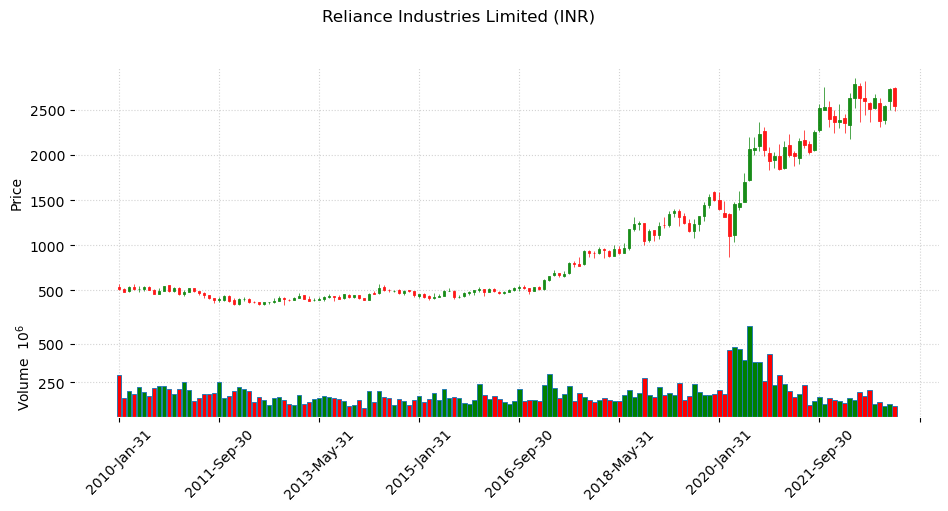

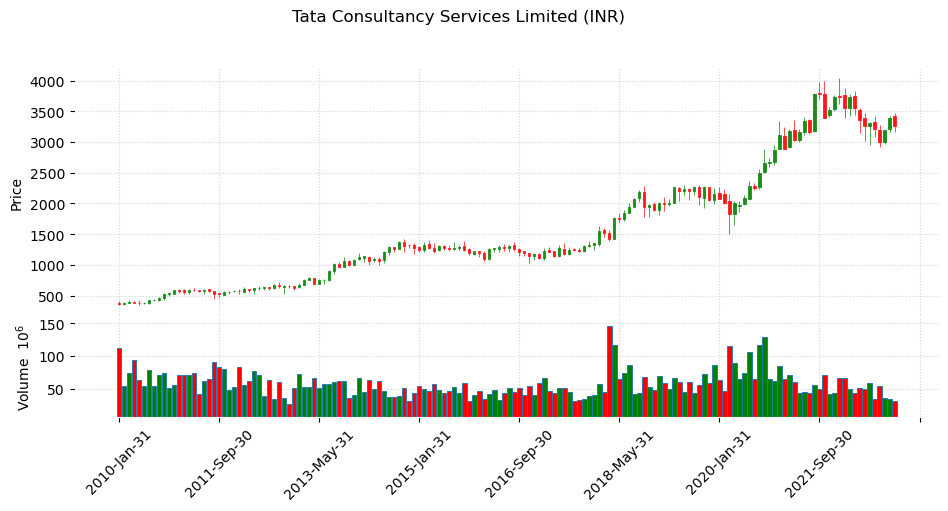

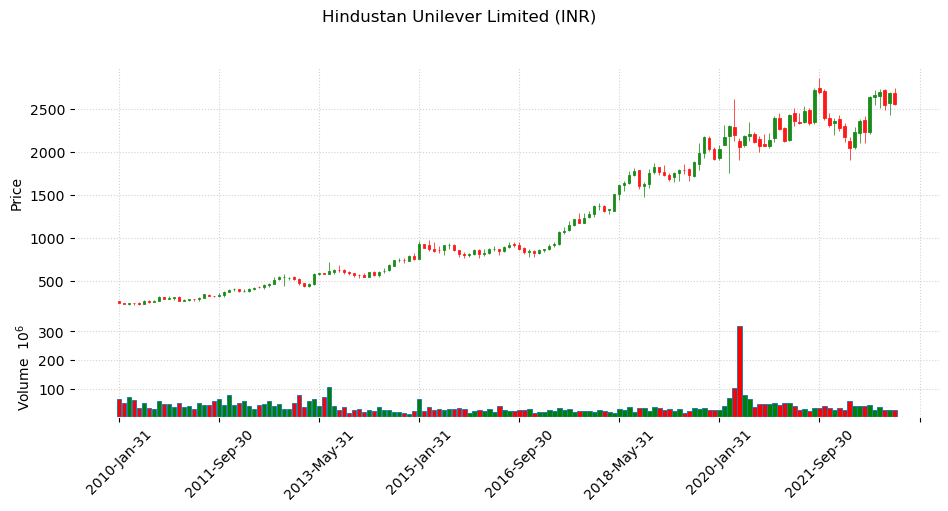

In [5]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

stock_names = ['RELIANCE.NS', 'TCS.NS', 'HINDUNILVR.NS']
titles = ['Reliance Industries Limited (INR)', 'Tata Consultancy Services Limited (INR)', 'Hindustan Unilever Limited (INR)']

load_file = pd.read_csv('nifty50_stocks.csv', index_col=0, parse_dates=True)

# Read the CSV files
stockA = load_file[load_file['Symbol'] == stock_names[0]][['Open', 'High', 'Low', 'Close', 'Volume']]
stockB = load_file[load_file['Symbol'] == stock_names[1]][['Open', 'High', 'Low', 'Close', 'Volume']]
stockC = load_file[load_file['Symbol'] == stock_names[2]][['Open', 'High', 'Low', 'Close', 'Volume']]

def daily_to_weekly(df):
    weekly_data = df.resample('M').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'})
    return weekly_data

stockA_weekly, stockB_weekly, stockC_weekly = daily_to_weekly(stockA), daily_to_weekly(stockB), daily_to_weekly(stockC)

# Defining a custom style for the charts
mc = mpf.make_marketcolors(up='g', down='r', edge='inherit', wick='inherit', volume='inherit', ohlc='inherit')
s = mpf.make_mpf_style(marketcolors=mc, facecolor='white', gridstyle='dotted', gridcolor='lightgrey', rc={'axes.edgecolor':'white'})

# List of data and titles
data = [stockA_weekly, stockB_weekly, stockC_weekly]

# Plot each stock (monthly)
for stock_data, title in zip(data, titles):
    fig, axes = mpf.plot(stock_data, volume=True, type='candle', style=s, figscale=1.2, title=title, figsize=(12,5), returnfig=True, warn_too_much_data=1000)
    plt.show()